Data Exploration and Modeling in Python
====

## This Kernal is Part 1 of 2 for the Ames housing data set: 
**Part 1: Data Exploration**

**Part 2: Creating a Predictive Model**

The goal of this kernal is to clean and prepare given data to develop of model to predict the SalePrice of a house. In Data Explortation, we will investigate the given data set and prepare the data for modeling. This will encapsulate feature enginnering, data cleaning, and dealing with missing data and outliers. Given the number of features, we will start with four key variables as determined by their correlation with our predictor variable.

Also I would like to thank Pedro Marcelino for his tutorial on Data Cleaning and Feature Engineering. His kaggle page can be found [here](https://www.kaggle.com/pmarcelino).




# Part 1: Data Exploration 

In [3]:
#Packages for Data Exploration 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
df_train = pd.read_csv('data/train.csv')

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

This is just an index of all the variables we are dealing with. I took a moment to organize them by catagorical and numerical variables to understand them better. I then listed them in order of my expectation of most predictive variables. Dean De Cock and Ames Housing dataset orginally compiled the data and provided a description given [here.](https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1514598704&Signature=n%2FDOyxpYNvMCOuez7Ii%2BE3VIqgwLgdkQQHw9Y2mYzdsaOXJn7UWWVDFjofGpuTt2iUJS4x0mVSmgRlJZM%2FljDtluqs3AUs37W%2Fu0Js1QcCxxCO7Lt05IrjjaNNCHDFeLJRwHNvy0K3FdNt6ZkDA6%2B%2Bg%2F%2FDYVEE9GzHN80xFkfhmff63OsB3n1EyizBUbfZuXJamTkRSMakYTsnXHxPsXYJnXfqQqUjRoLjNMgx9oL71aAcdBLXmwb%2FALvanN1KwhSOGigNJteH%2FWICTarWs9nDgnJ3d3ZELXEg7MTjcGvdzpOgBu%2BlfJ8bIILkYs39axoqQKOLM0Rd5BAjeORggVDQ%3D%3D)

In [5]:
df_train.head(10) #first 10 Rows of our data set to see what we are dealing with 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


# The Four Most Predictive Variables of SalesPrice: 
1. OverallQual
2. YearBuilt
3. TotalBsmtSF
4. GrLivArea

Note: This is just a rough inference about which variables are the most predictive. I ran scatterplots for each variable against SalePrice and graphically checked to see if their exists a significant relationship. An example is provided below: I would say GrLivArea has better predictive power on SalePrice than BsmtFinSF2. 

Text(0.5,1,'SalePrice vs GrLivArea')

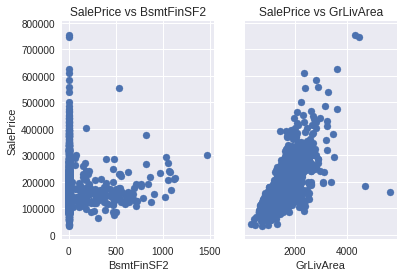

In [6]:
f, ax = plt.subplots(1, 2, sharey=True)

ax[0].scatter(df_train['BsmtFinSF2'], df_train['SalePrice'])
ax[0].set_xlabel('BsmtFinSF2')
ax[0].set_title('SalePrice vs BsmtFinSF2')
ax[0].set_ylabel('SalePrice')
ax[1].scatter(df_train['GrLivArea'], df_train['SalePrice'])
ax[1].set_xlabel('GrLivArea')
ax[1].set_title('SalePrice vs GrLivArea')

Here, I would have selected GrLivArea as a influencal variable as there seems to exist a positive linear trend while, BsmtFinSF2 shows a random cluster of points with a signficant amount of values at 0 (for houses with no second basement). 

Text(0.5,1,'SalePrice vs OverallQual')

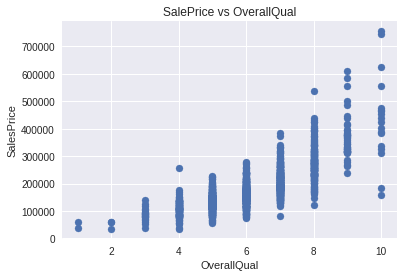

In [7]:
plt.scatter(df_train.OverallQual,df_train.SalePrice)
plt.xlabel('OverallQual')
plt.ylabel('SalesPrice')
plt.title('SalePrice vs OverallQual')

Text(0.5,1,'SalePrice vs YearBuilt')

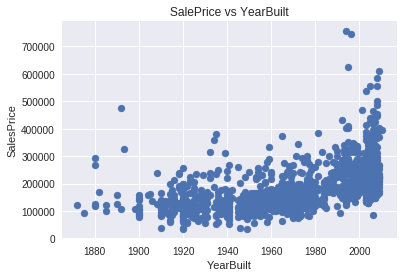

In [8]:
plt.scatter(df_train.YearBuilt,df_train.SalePrice)
plt.xlabel('YearBuilt')
plt.ylabel('SalesPrice')
plt.title('SalePrice vs YearBuilt')

Text(0.5,1,'SalePrice vs TotalBsmtSF')

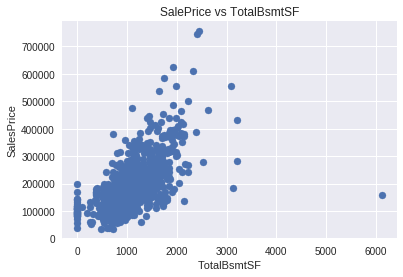

In [9]:
plt.scatter(df_train.TotalBsmtSF,df_train.SalePrice)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalesPrice')
plt.title('SalePrice vs TotalBsmtSF')

Text(0.5,1,'SalePrice vs GrLivArea')

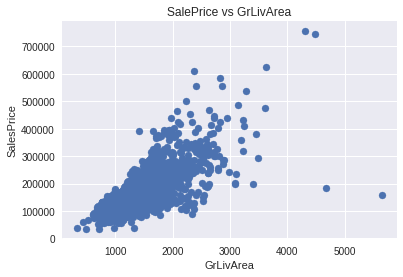

In [10]:
plt.scatter(df_train.GrLivArea,df_train.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalesPrice')
plt.title('SalePrice vs GrLivArea')

# Understanding SalePrice

In [11]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

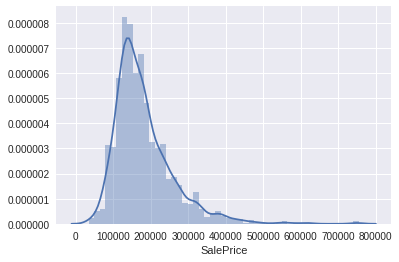

In [12]:
sns.distplot(df_train.SalePrice)

In [36]:
print("Skewness: %f" % df_train.SalePrice.skew())
print("Kurtosis: %f" % df_train.SalePrice.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


The SalePrice shows heavy right skew and peakness. This is reflected by a Skewness measure of 1.88 and Kurtosis Measure of 6.54. We will further investigate this later and be careful with the models implemented given the image and measures. To give you an idea of what these values represent a perfectly normal distribution would have a Skewness measure of 0 and Kurtosis measure of 3. An image below is provided for a better understanding, and a link [here](http://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm) for a tutorial on such measures. 


![Examples of different distribution with Skewness and Kurtosis measures](data/Images/skewness.gif)

# Exploring Relationships Between SalePrice and our Four Most Predictice Variables

Text(0.5,1,'SalePrice Vs OverallQual')

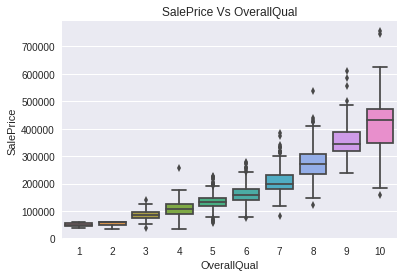

In [13]:
sns.boxplot(x=df_train.OverallQual,y=df_train.SalePrice).set_title('SalePrice Vs OverallQual')


Here we can see as OverallQual increases SalePrice increases. 

Text(0.5,1,'SalePrice Vs YearBuilt')

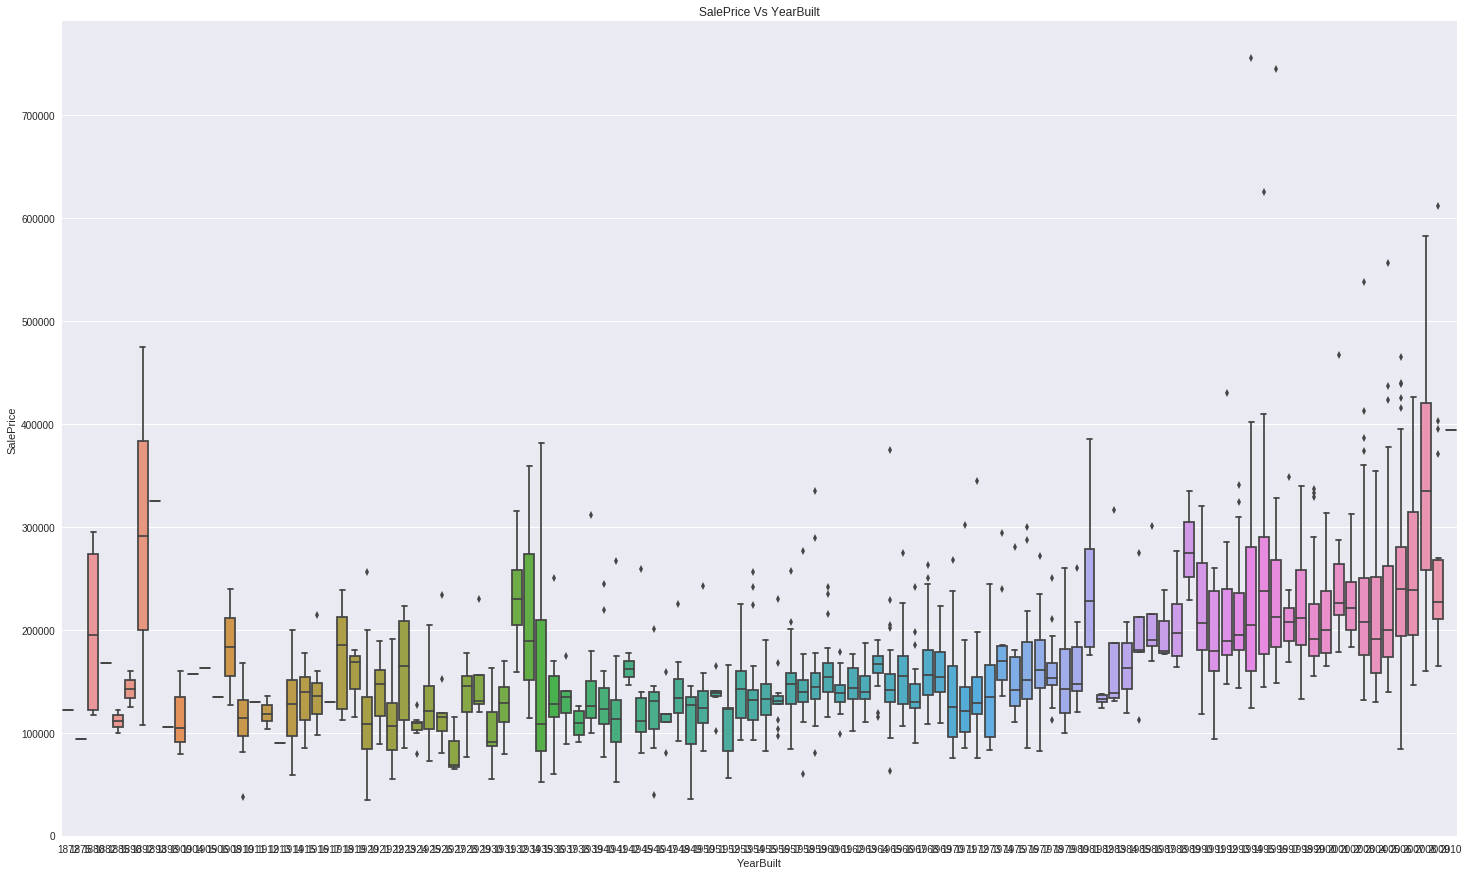

In [14]:
plt.figure(figsize=(25, 15))
sns.boxplot(x=df_train['YearBuilt'],
            y=df_train['SalePrice']).set_title('SalePrice Vs YearBuilt')

It is difficult to see the year given we have data on so many. However, one can see an general trend as YearBuilt increases then SalePrice increases. In other words, the more recently the house has been built the price goes up. There also seems to be a seasonal trend, this will be dealt with via TimeSeries techniques will return to this. 

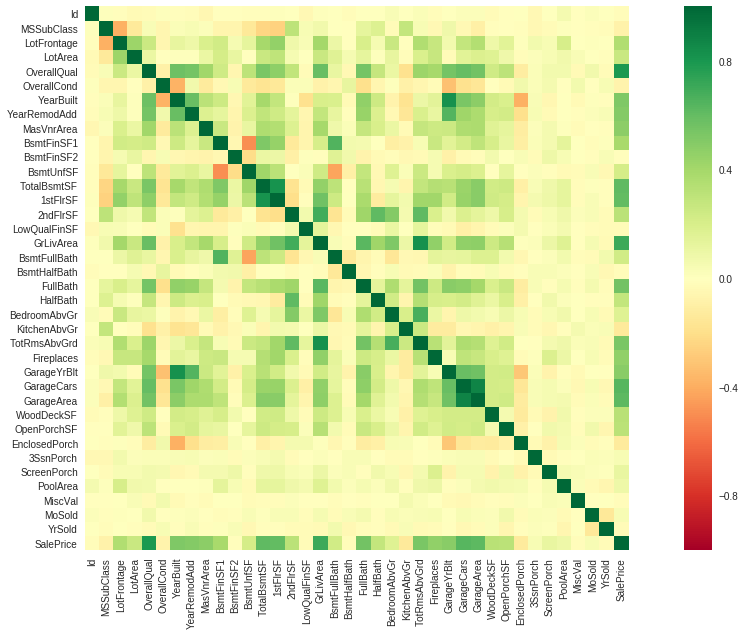

In [15]:
plt.figure(figsize=(20, 10))
corrmat=df_train.corr()
sns.heatmap(corrmat,cmap="RdYlGn",square=True)

This is a correlation matrix of the given variables. Things we look for: 
1. High correlation between a variable and SalePrice 
2. High correlation between two variables in order to deal with interaction between prector variables

It is reassuring to see that our four most predictive variables (OverallQual, Yearbuilt, TotalBsmtSF, and GrLivArea) are strongly correlated with SalePrice. It is important to such correlation between TotalBsmtSF and 1stFlrSF or GarageCars and Garage Area because they are variables that could be potentially used in our model. It makes sense that they are highly correlated because they give us the same information. For example the square footage of the first floor is directly relationed to the size of the basement because it is directly above and the number of cars that can fit in the garage in directly relationed to the size of the garage. We will select only one variable in these pairs for our model because of this. 

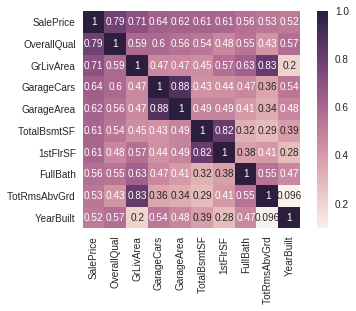

In [17]:
cols = corrmat.SalePrice.nlargest(10).index
cr = np.corrcoef(df_train[cols].values.T)
sns.heatmap(cr,annot=True,square=True,yticklabels=cols.values,xticklabels=cols.values)

This is a subset of correlation matrix above. It has the 10 most correlated variables with SalePrice. Notice we have discarded highly correlated explainatory variables such as 1stFlrSF, GarageArea, and TotRmsAbvGrd. 

## Dealing with Missing Data 

In [18]:
missing_total = df_train.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_total/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_total,missing_percent],axis=1,keys=['Total','Percent'])
missing_data = missing_data.sort_values(by='Percent', ascending=False)
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479


Here we created a table showing the number of missing observation per variable and the percent of data missing from each variable. As a rule, we will discard any variable with over 15 percent missing data. The other variables from 6-2 percent missing data we will consider insignificant because they are either highly correlated with other variables or show little correlation with SalePrice. As for Electrical because it has only one missing observation and is correlated with SalePrice we will simply get rid of this missing observation. 

In [19]:
(missing_data[missing_data['Total']>1]).index
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


This is the new data set we are working with! WOOHOO!!!

In [20]:
df_train.isnull().sum().max() #double checking all of our missing data is taken care of 

1452

## Dealing with Outliers

In [21]:
df_train['SalePrice'].head(10)

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64

In [22]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribtuion')
print(low_range)
print('outer range (high) of the distribution')
print(high_range)

outer range (low) of the distribtuion
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
outer range (high) of the distribution
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


We need to standardize the SalePrice to get an idea of what the outliers look like. The SalePrices below the mean SalePrice down seem to be to far from the mean however, the SalePrice above the mean SalePrice seem to be significantly larger. This was also reflected in our positively skewed distribution of SalePrice from before. 

In [23]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

From the scatterplots before we see two major outliers in GrLivArea that don't seem to follow the trend of the data therefore we will drop these observations and redo the scatterplot. 

Text(0,0.5,'SalesPrice')

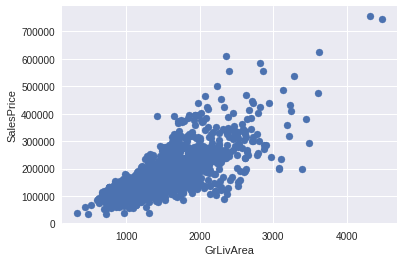

In [24]:
plt.scatter(df_train.GrLivArea,df_train.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalesPrice')

## Testing 4 Assumptions of our Dependent Variable: 
* Normality 
* Homoscedasticty 
* Linearity 
* Absense of Correlated Errors


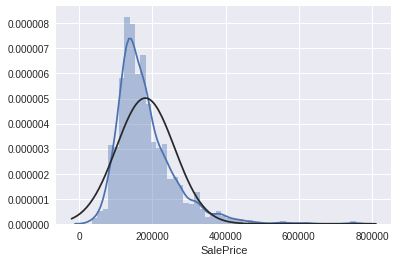

In [25]:
sns.distplot(df_train['SalePrice'], fit=norm)

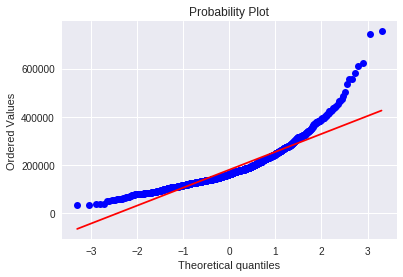

In [26]:
fig = stats.probplot(df_train['SalePrice'], plot=plt)

The SalePrices are evidently not perfectly normal from the two graphs above. From the second graph we can see the left tail is short and the right tail is really long. An approach to deal with such skewness is logging the SalePrice data and regraph it. 

In [27]:
df_train['SalePrice']=np.log(df_train['SalePrice']) #log transformation

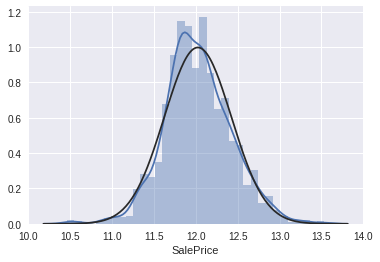

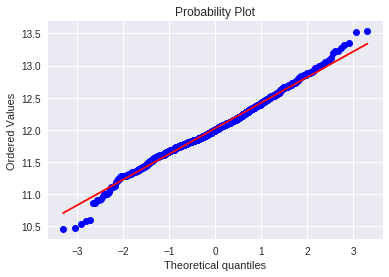

In [28]:
sns.distplot(df_train['SalePrice'],fit=norm)
fig = plt.figure()
fig = stats.probplot(df_train['SalePrice'],plot=plt)

## Checking the Normality of Numerical Variables from Our Most Predictive Variables

1. GrLivArea
2. TotalBsmtSF

OverallQual and YearBuilt are being treated as catagorical variables therefore we need to check only GrLivArea and TotalBsmtSF

In [29]:
df_train = pd.get_dummies(df_train) #this converts categorical variables into dummy variables for our models

## Histogram and Probability Plot of GrLivArea

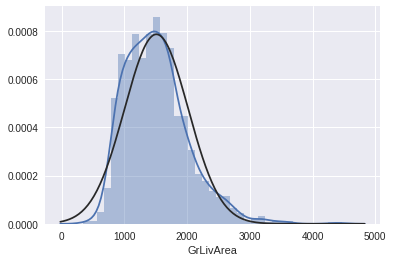

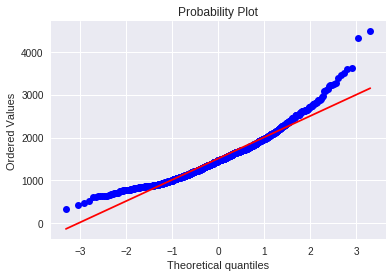

In [30]:
sns.distplot(df_train['GrLivArea'],fit=norm)
fig = plt.figure()
fig = stats.probplot(df_train['GrLivArea'], plot = plt)

It looks like GrLivArea is normal but skewed. We will apply a log transformation to the data. 

## Histogram and Probability Plot of Log(GrLivArea)

In [31]:
df_train['GrLivArea']=np.log(df_train['GrLivArea']) #log Transformation 

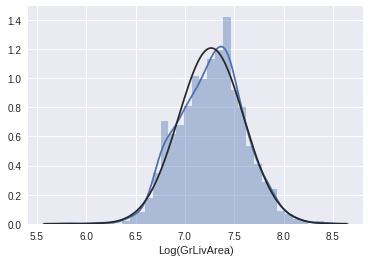

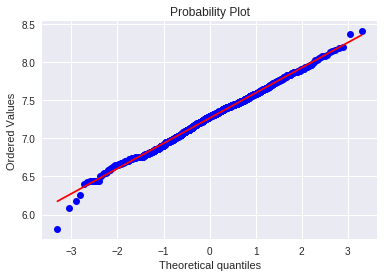

In [32]:
sns.distplot(df_train['GrLivArea'],fit=norm,axlabel='Log(GrLivArea)')
fig = plt.figure()
fig = stats.probplot(df_train['GrLivArea'],plot=plt)

This seems a lot better than before. Take note of the heavy negative skew.

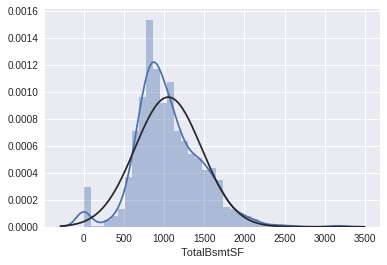

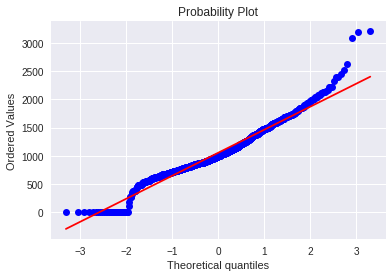

In [33]:
sns.distplot(df_train['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'],plot = plt)

This is quite gross. It looks like TotalBsmtSF is, in general, skewed. Also there are a ton of observations with value zero (These values correspond to houses without a basement. The value zero then does not allow us to log transform the data. In this case, we are going to create a binary variable with index 0 = no basement and 1 = basement. This way we can log transform the data with value 1, while still keeping the effect of having a basement in our model.

In [34]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1

In [35]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF']) #Log Transformation 

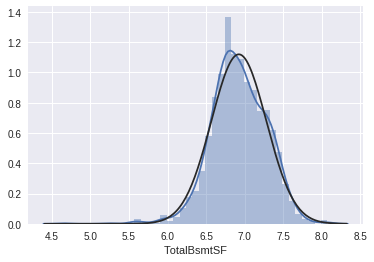

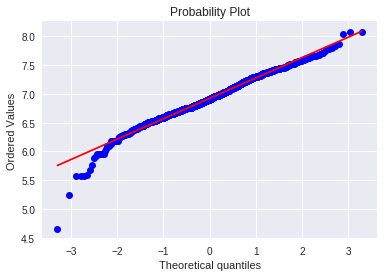

In [36]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],fit=norm)
fig = plt.figure()
fig = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot = plt)

Ahhhh Yes, that is much better. We still must be careful about the heavy left skew on the data when builting the model. 

## Checking the Homoscedasticty of Numerical Variables 
OverallQual and YearBuilt are being treated as catagorical variables therefore we need to check only GrLivArea and TotalBsmtSF

A great way to do so is graphically via a scatter plot between SalePrice and our Predictor Variables. What we look for : 
1. an increases in variable in SalePrice as the predictor variable increases in value 
2. a cone shape of somesort 

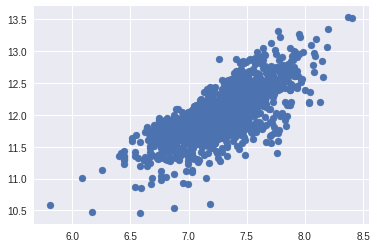

In [37]:
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])

Sale price seems to have equal variance across the values of Log(GrLivArea).

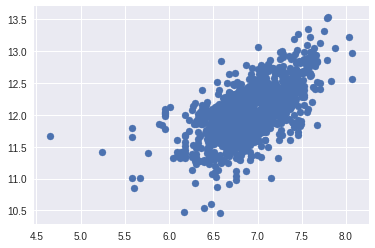

In [38]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

Sale price seems to have equal variance across the values of Log(TotalBsmtSF).

## We should now have a good understanding of the data and the data is now prepared to be implemented in a model.